In [1]:
import scipy.stats as stats
import scipy.special as sp

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 2

In [2]:
gauss = stats.norm(loc=82,scale=8)

### Part A

In [3]:
gauss.cdf(70)

0.06680720126885807

In [4]:
gauss.cdf(85)-gauss.cdf(70)

0.5793625654038657

In [5]:
1-gauss.cdf(85)

0.35383023332727626

### Part B

In [6]:
lis = gauss.rvs(1000000)
greater_than_80 = lis >= 80
greater_than_85 = lis >= 85
np.sum(greater_than_85)/np.sum(greater_than_80)

0.5911556069997511

### Part C

In [7]:
def gauss_pdf(mu, var, x):
    return 1/(2*np.pi*var)**(1/2)*np.exp(-(x-mu)**2/(2*var))

In [8]:
for mu in range(30,100):
    for var in range(30,200):
        prob_a = 0
        prob_b = 0
        for x_a in range(85,100): # calculate the cdf of a
            prob_a+=gauss_pdf(mu,var,x_a)
        for x_b in range(70,85): # calculate the cdf of b
            prob_b+=gauss_pdf(mu,var,x_b)
        if (abs(prob_a-.25) <= .0025 and (abs(prob_b-.52) <= .0025)):
            print("Mu = ",mu,". Var = ",var,". Prob of A = ",prob_a,". Prob of B = ",prob_b,".",sep="")

Mu = 78. Var = 111. Prob of A = 0.2479537739631005. Prob of B = 0.5216353936665281.
Mu = 78. Var = 112. Prob of A = 0.24840772370227115. Prob of B = 0.5196808507166172.
Mu = 78. Var = 113. Prob of A = 0.24884873008939257. Prob of B = 0.5177478397299403.


In [9]:
new_gauss = stats.norm(loc=78, scale = 112**.5) # create a new gaussian with the paramaters found above

In [10]:
new_gauss.cdf(85)-new_gauss.cdf(70) # probability of a B

0.5209883142394818

In [11]:
1-new_gauss.cdf(85) # probability of an A

0.2541657867760727

## Problem 5

### a. Define the pmf function of the binomial random variable

In [12]:
def binom_pdf(k):
    return sp.binom(100,k)*(.65**k)*(1-.65)**(100-k)

In [13]:
sum = 0
for i in range(60,70):
    sum+=binom_pdf(i)
sum

0.701957712263844

### b. Random variable - summing the pmf

In [14]:
rv = stats.binom(n=100,p=.65)

In [15]:
sum = 0
for i in range(60,70):
    sum+=rv.pmf(i)
sum

0.7019577122638231

### c. Random variable - using the cdf

In [16]:
rv.cdf(70)-rv.cdf(60)

0.7039868846425189

## Problem 6

### Part A

In [17]:
def solve(m1,m2,std1,std2,s1,s2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log((std2*s1)/(std1*s2))
  return np.roots([a,b,c])

In [18]:
def plot_curves(m1,m2,std1,std2,s1,s2,l1,l2): 
    low_noise = stats.norm(loc=m1,scale=std1)
    power = stats.norm(loc=m2,scale=std2)
    
    fig, ax = plt.subplots()

    x=np.linspace(-10,10,100000)
    ax.plot(x,s1*low_noise.pdf(x),label=l1)
    ax.plot(x,s2*power.pdf(x),label=l2)

    intersections_x = solve(m1,m2,std1,std2,s1,s2)
    intersections_y = s1*low_noise.pdf(intersections_x)
    
    ax.scatter(intersections_x,intersections_y)

    ax.legend()
    
    plt.show()
    
    return intersections_x,intersections_y

In [19]:
def map_decide(intersections_x, curr_x, decision_1, decision_2):
    if ((intersections_x[1] < curr_x and curr_x < intersections_x[0]) or (intersections_x[1] < curr_x and curr_x < intersections_x[0])):
        return decision_1
    else:
        return decision_2

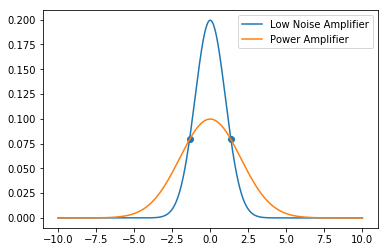

MAP decision boundary:
Choose the Power Amplifier for any point with an x less than 1.3595559868917453,0.07916017444797833 or an x greater than -1.3595559868917453,0.07916017444797833. For the region inbetween these two points, choose the Low Noise Amplifier.


In [20]:
m1 = 0 # mean
std1 = 1**.5 # std_dev
s1 = 1/2 # scale factor
l1 = "Low Noise Amplifier"

m2 = 0 # mean
std2 = 4**.5 # std_dev
s2 = 1/2 #scale factor
l2 = "Power Amplifier"

intersections_x,intersections_y = plot_curves(m1,m2,std1,std2,s1,s2,l1,l2)

print("MAP decision boundary:\nChoose the Power Amplifier for any point with an x less than ",intersections_x[0],",",intersections_y[0]," or an x greater than ",intersections_x[1],",",intersections_y[1],". For the region inbetween these two points, choose the Low Noise Amplifier.",sep="")

### Part B

In [21]:
# Provided a set of intersections, one can determine
# the decision boundary for any scaling of these two
# normal distributions

m1 = 0 # mean
std1 = 1**.5 # std_dev
s1 = 1/2 # scale factor
l1 = "Low Noise Amplifier"

m2 = 0 # mean
std2 = 4**.5 # std_dev
s2 = 1/2 #scale factor
l2 = "Power Amplifier"

for x_int in range(-75,75,2):
    x = x_int/10
    print("Decide ", map_decide(solve(m1,m2,std1,std2,s1,s2), x, l1, l2), ", given x=", x, sep="")

Decide Power Amplifier, given x=-7.5
Decide Power Amplifier, given x=-7.3
Decide Power Amplifier, given x=-7.1
Decide Power Amplifier, given x=-6.9
Decide Power Amplifier, given x=-6.7
Decide Power Amplifier, given x=-6.5
Decide Power Amplifier, given x=-6.3
Decide Power Amplifier, given x=-6.1
Decide Power Amplifier, given x=-5.9
Decide Power Amplifier, given x=-5.7
Decide Power Amplifier, given x=-5.5
Decide Power Amplifier, given x=-5.3
Decide Power Amplifier, given x=-5.1
Decide Power Amplifier, given x=-4.9
Decide Power Amplifier, given x=-4.7
Decide Power Amplifier, given x=-4.5
Decide Power Amplifier, given x=-4.3
Decide Power Amplifier, given x=-4.1
Decide Power Amplifier, given x=-3.9
Decide Power Amplifier, given x=-3.7
Decide Power Amplifier, given x=-3.5
Decide Power Amplifier, given x=-3.3
Decide Power Amplifier, given x=-3.1
Decide Power Amplifier, given x=-2.9
Decide Power Amplifier, given x=-2.7
Decide Power Amplifier, given x=-2.5
Decide Power Amplifier, given x=-2.3
D

### Part C

In [22]:
def vary_densities(low_noise_prob, plot_logarithmic=False):
    m1 = 0 # mean
    std1 = 1**.5 # std_dev
    s1 = low_noise_prob # scale factor
    l1 = "Low Noise Amplifier"

    m2 = 0 # mean
    std2 = 4**.5 # std_dev
    s2 = 1-low_noise_prob #scale factor
    l2 = "Power Amplifier"

    plot_curves(m1,m2,std1,std2,s1,s2,l1,l2)

### Part D

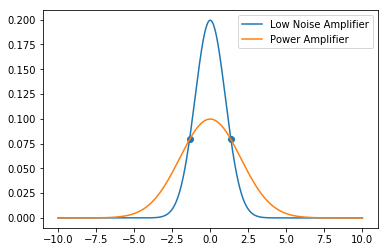

In [23]:
vary_densities(0.5)

### Part E

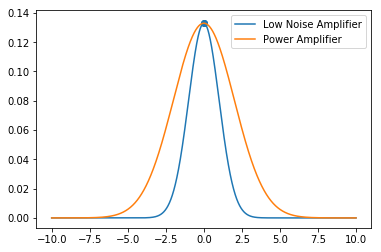

In [30]:
vary_densities(1/3)

### Part F

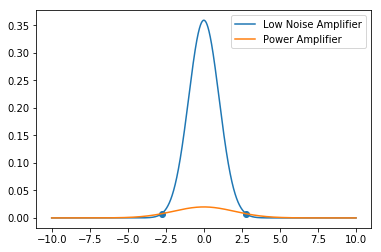

In [25]:
vary_densities(0.9)

### Part G

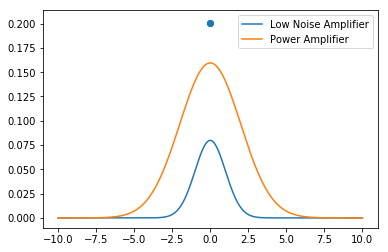

In [26]:
vary_densities(0.2)

When the probability of a random chosen chip being a low noise amplifier is 0.2, the math breaks down and we always decide that it's a power amplifier and never decide that it's a low noise amplifier.

### Part H

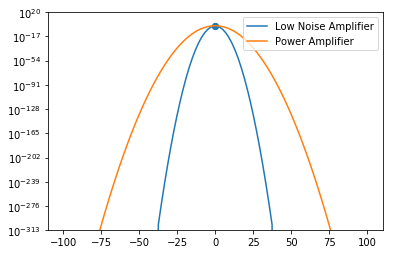

In [27]:
low_noise_prob = 0.2

m1 = 0 # mean
std1 = 1**.5 # std_dev
s1 = low_noise_prob # scale factor
l1 = "Low Noise Amplifier"

m2 = 0 # mean
std2 = 4**.5 # std_dev
s2 = 1-low_noise_prob #scale factor
l2 = "Power Amplifier"

low_noise = stats.norm(loc=m1,scale=std1)
power = stats.norm(loc=m2,scale=std2)

x=np.linspace(-10**2,10**2,10**2)
plt.semilogy(x,s1*low_noise.pdf(x),label=l1)
plt.semilogy(x,s2*power.pdf(x),label=l2)

intersections_x = solve(m1,m2,std1,std2,s1,s2)
intersections_y = s1*low_noise.pdf(intersections_x)

plt.scatter(intersections_x,intersections_y)

plt.legend();

### Part I

Probability of a randomly chosen chip being a low-noise amplifier=0.4.


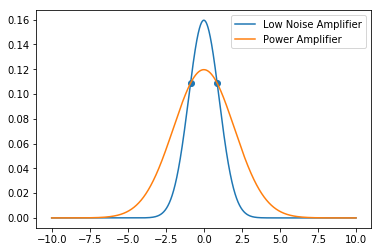

Probability of a randomly chosen chip being a low-noise amplifier=0.39.


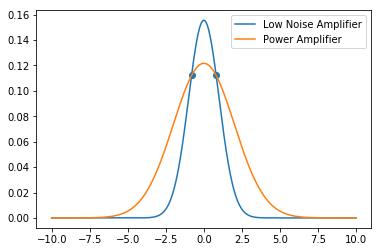

Probability of a randomly chosen chip being a low-noise amplifier=0.38.


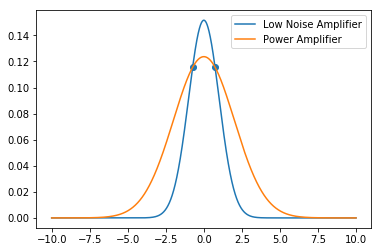

Probability of a randomly chosen chip being a low-noise amplifier=0.37.


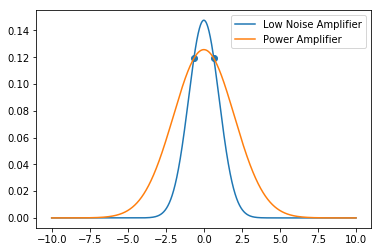

Probability of a randomly chosen chip being a low-noise amplifier=0.36.


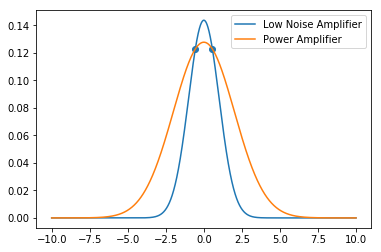

Probability of a randomly chosen chip being a low-noise amplifier=0.35.


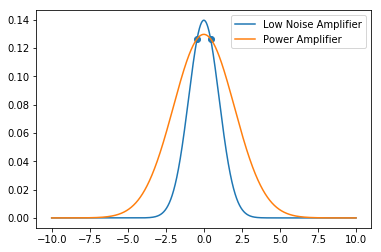

Probability of a randomly chosen chip being a low-noise amplifier=0.34.


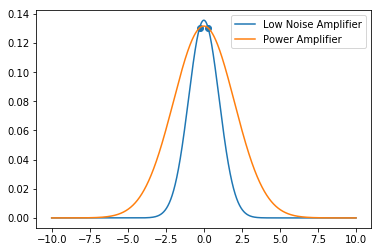

Probability of a randomly chosen chip being a low-noise amplifier=0.33.


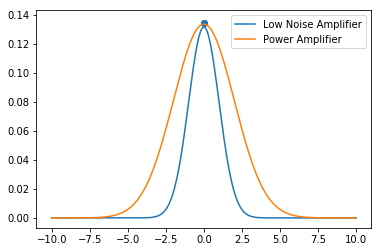

Probability of a randomly chosen chip being a low-noise amplifier=0.32.


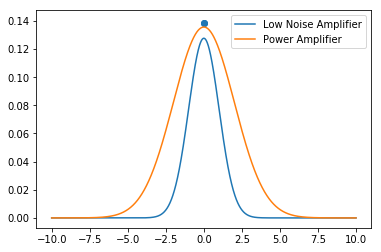

Probability of a randomly chosen chip being a low-noise amplifier=0.31.


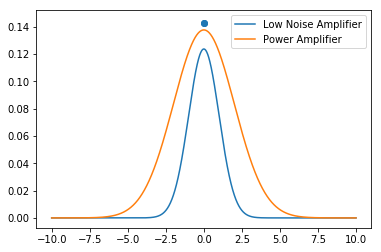

Probability of a randomly chosen chip being a low-noise amplifier=0.3.


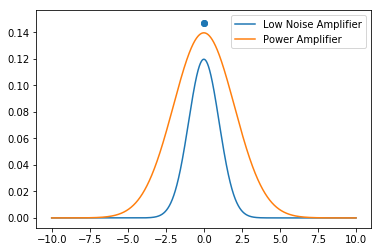

Probability of a randomly chosen chip being a low-noise amplifier=0.29.


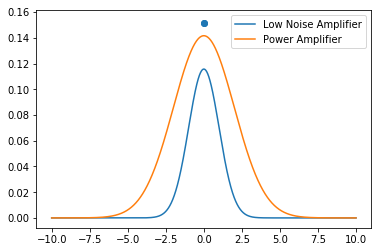

Probability of a randomly chosen chip being a low-noise amplifier=0.28.


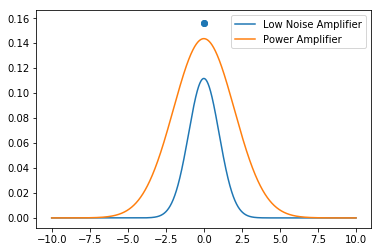

Probability of a randomly chosen chip being a low-noise amplifier=0.27.


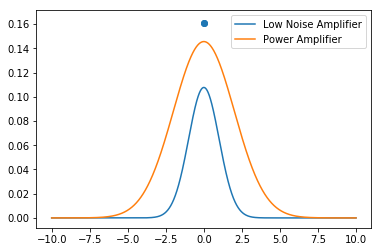

Probability of a randomly chosen chip being a low-noise amplifier=0.26.


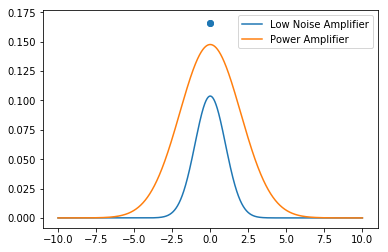

Probability of a randomly chosen chip being a low-noise amplifier=0.25.


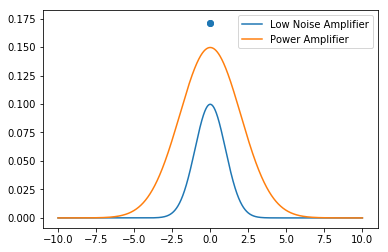

Probability of a randomly chosen chip being a low-noise amplifier=0.24.


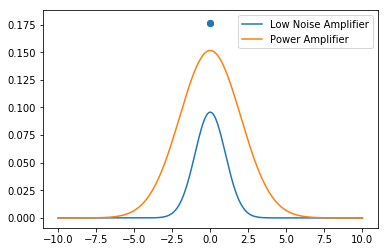

Probability of a randomly chosen chip being a low-noise amplifier=0.23.


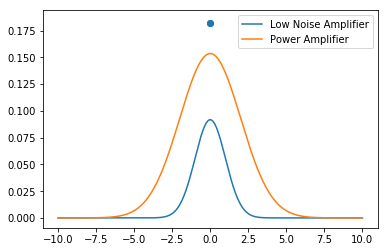

Probability of a randomly chosen chip being a low-noise amplifier=0.22.


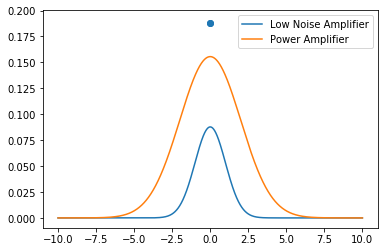

Probability of a randomly chosen chip being a low-noise amplifier=0.21.


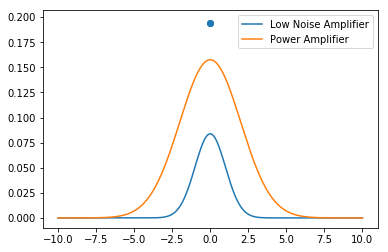

In [29]:
for x_int in range (40,20,-1):
    x = x_int/100
    print("Probability of a randomly chosen chip being a low-noise amplifier=",x,".",sep="")
    vary_densities(x)

As seen above, the logic breaks down when the probability of a randomly chosen chip being a low-noise amplifier is approximately one third.